# 1. Observação dos Dados e Hipóteses Iniciais
Primeiro, carregamos o dataset e inspecionamos as primeiras linhas e o tipo de cada coluna para entender sua estrutura:

In [1]:
import pandas as pd

# Carregar dados
df = pd.read_csv('/student_habits_performance.csv')
df.head(5)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


O dataset contém 1000 registros de estudantes com variáveis como idade, gênero, horas de estudo, atividades de lazer (redes sociais, Netflix), trabalho de meio período, presença nas aulas, hábitos de saúde (sono, dieta, exercício), educação dos pais e um indicador de saúde mental, além da nota no exame. **Hipóteses iniciais (antes da EDA):**
Estudantes que estudam mais horas por dia devem ter

*   Estudantes que estudam mais horas por dia devem ter média de nota mais alta no exame.
*   Mais horas em redes sociais ou Netflix poderiam se relacionar com notas mais baixas.
*   Maior comparecimento às aulas (attendance) indica mais disciplina, sugerindo notas melhores.
*   Horas de sono adequadas e dieta/exercício regulares também podem contribuir para melhor desempenho.
*   Estudantes com emprego de meio período podem estudar menos horas, possivelmente impactando as notas.
*   Estudantes com emprego de meio período podem estudar menos horas, possivelmente impactando as notas.

Registramos essas suposições iniciais para compará-las depois da análise exploratória.

# 2. Análise Exploratória de Dados (EDA)
Nesta etapa exploramos estatísticas descritivas, distribuições e relações entre variáveis para validar ou refinar hipóteses:

In [2]:
# Informações gerais e estatísticas descritivas
df.info()
df.describe().round(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,84.13,6.47,3.04,5.44,69.60
std,2.31,1.47,1.17,1.08,9.40,1.23,2.03,2.85,16.89
min,17.00,0.00,0.00,0.00,56.00,3.20,0.00,1.00,18.40
25%,18.75,2.60,1.70,1.00,78.00,5.60,1.00,3.00,58.48
50%,20.00,3.50,2.50,1.80,84.40,6.50,3.00,5.00,70.50
75%,23.00,4.50,3.30,2.52,91.02,7.30,5.00,8.00,81.32
max,24.00,8.30,7.20,5.40,100.00,10.00,6.00,10.00,100.00


Notamos que as colunas categóricas (gênero, emprego de meio período, qualidade da dieta, etc.) e numéricas (horas de estudo, redes sociais, nota do exame) estão completas (sem valores faltantes).

# Estatísticas descritivas

In [3]:
df[['study_hours_per_day','social_media_hours','exam_score']].describe().round(2)


,study_hours_per_day,social_media_hours,exam_score
count,1000.00,1000.00,1000.00
mean,3.55,2.51,69.60
std,1.47,1.17,16.89
min,0.00,0.00,18.40
25%,2.60,1.70,58.48
50%,3.50,2.50,70.50
75%,4.50,3.30,81.32
max,8.30,7.20,100.00




*   Média de 3,44 horas de estudo/dia, mas com grande variância (desvio ~2,55h).
*   Horas médias em redes sociais ~3,3h/dia.
*   Nota média de exame ~62, mas vai de 10 até 100.
Distribuições e Relações

# Distribuições e Relações




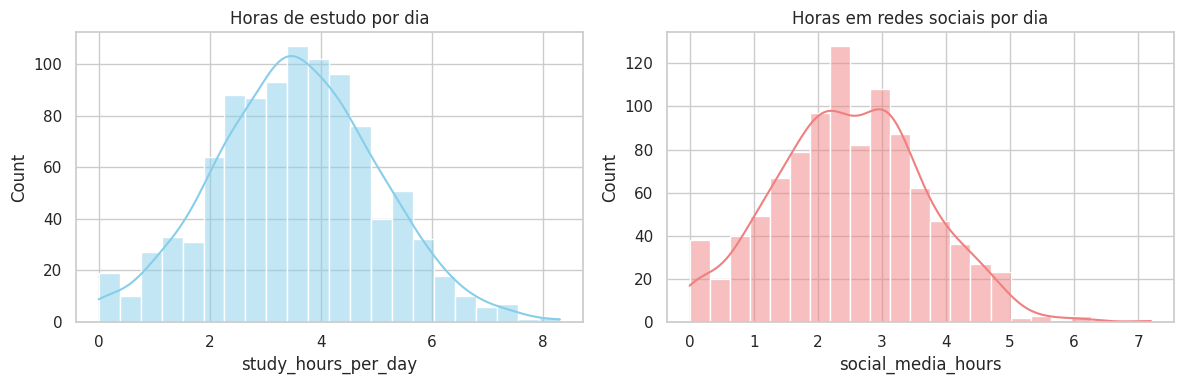

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

# Histograma de horas de estudo e de redes sociais
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['study_hours_per_day'], kde=True, ax=axes[0], color='skyblue').set_title("Horas de estudo por dia")
sns.histplot(df['social_media_hours'], kde=True, ax=axes[1], color='lightcoral').set_title("Horas em redes sociais por dia")
plt.tight_layout()
plt.show()


Vemos que maioria estuda entre 0 e 5 horas/dia, com alguns valores elevados.
Redes sociais também têm massa concentrada entre 0 e 5 horas.

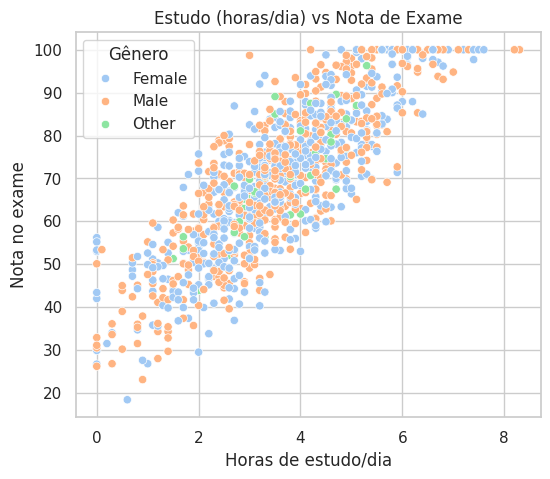

In [5]:
# Gráfico de dispersão: horas de estudo vs nota de exame
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title("Estudo (horas/dia) vs Nota de Exame")
plt.xlabel("Horas de estudo/dia"); plt.ylabel("Nota no exame")
plt.legend(title='Gênero')
plt.show()


Há uma tendência aparente de notas maiores para quem estuda mais. Também podemos ver variação entre gêneros, mas é mais para ilustrar clusters.

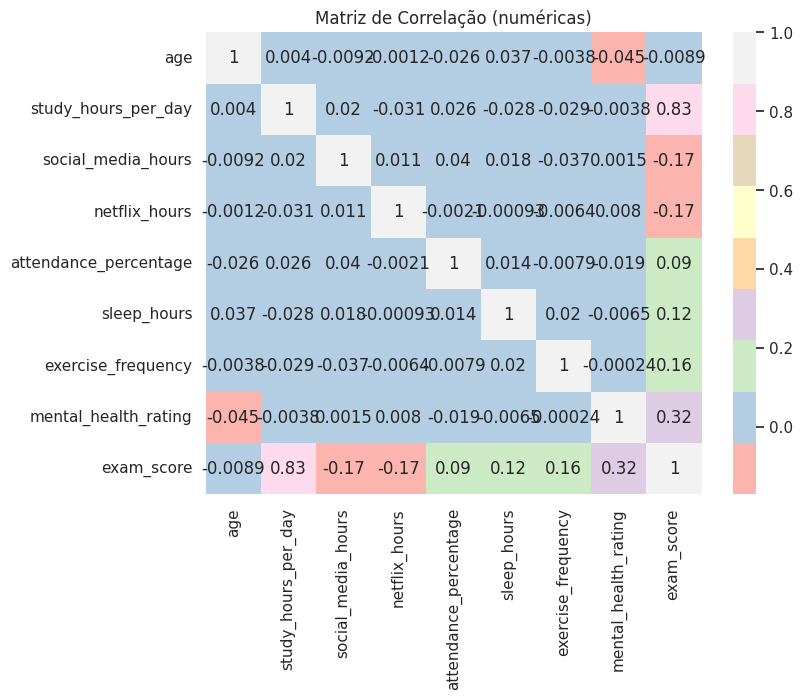

In [6]:
# Mapa de calor de correlações das variáveis numéricas
num_cols = ['age','study_hours_per_day','social_media_hours','netflix_hours',
            'attendance_percentage','sleep_hours','exercise_frequency',
            'mental_health_rating','exam_score']
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Pastel1")
plt.title("Matriz de Correlação (numéricas)")
plt.show()




*   Correlação nota-exame vs outras: vemos forte correlação positiva entre study_hours_per_day e exam_score (~0.83).
*   Correlação negativa moderada de social_media_hours (~ -0.17) e netflix_hours (~ -0.17) com a nota.
*   attendance_percentage e exercise_frequency têm correlações ligeiramente positivas com a nota (aprox 0.09 e 0.16).
*   mental_health_rating correlaciona moderadamente (0.32) com nota, sugerindo bem-estar associado a melhor desempenho.




<ipython-input-7-4ccb356ca609>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='part_time_job', y='exam_score', palette='pastel')


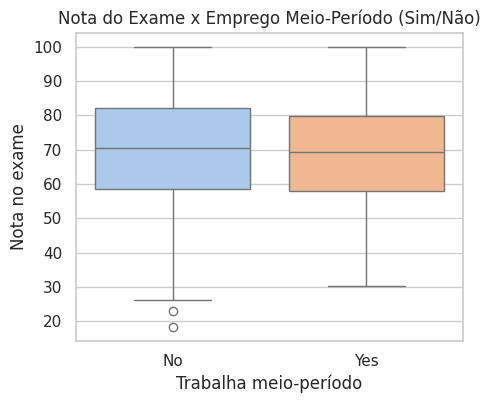

In [7]:
# Boxplot: nota de exame por emprego meio-período
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='part_time_job', y='exam_score', palette='pastel')
plt.title("Nota do Exame x Emprego Meio-Período (Sim/Não)")
plt.xlabel("Trabalha meio-período"); plt.ylabel("Nota no exame")
plt.show()


Alunos sem emprego de meio período tendem a ter nota mediana mais alta que os que têm. Isso apoia a hipótese de que trabalhar reduz tempo de estudo.

<ipython-input-8-821d667c0fbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='extracurricular_participation', y='exam_score', palette='pastel')


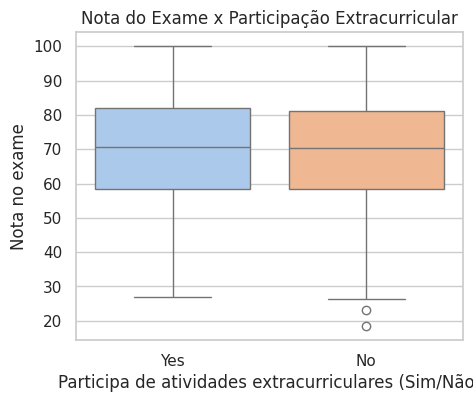

In [8]:
# Boxplot: nota de exame por participação extracurricular
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score', palette='pastel')
plt.title("Nota do Exame x Participação Extracurricular")
plt.xlabel("Participa de atividades extracurriculares (Sim/Não)")
plt.ylabel("Nota no exame")
plt.show()




*   A participação extracurricular parece não afetar tanto as notas, ou no máximo notas medianas levemente superiores para quem participa.

A EDA mostra o seguinte:



*   Horas de estudo têm papel crucial na performance.
*   Atividades de lazer excessivas podem prejudicar a nota.
*   Assiduidade às aulas, qualidade de sono, dieta e exercício parecem beneficiar a nota, mas as correlações são menores.
*   Emprego de meio período realmente se associa a notas mais baixas, sugerindo que conciliar trabalho pode reduzir desempenho acadêmico.
*   Não há relações evidentes com características demográficas (idade, gênero, educação dos pais), mas focamos nos hábitos.











# 3. Revisão das Hipóteses Iniciais



Estudo vs Nota: Confirmado. Maior dedicação aos estudos => notas mais altas (correlação forte).

Redes sociais/Netflix: Também confirmado: mais horas
de lazer digital correlacionam com notas ligeiramente menores.

Assiduidade: Alunos com maior frequência têm notas um pouco maiores (correlação positiva pequena).

Sono/Dieta/Exercício: Há tendência positiva (ex.: alunos que dormem mais ou fazem mais exercício têm notas medianas melhores), embora correlação seja pequena.

Emprego de meio-período: Hipótese confirmada: quem trabalha tende a ter nota mediana menor.

Atividades extracurriculares: Não apresentou efeito claro; alunas/os com e sem diferenciais similares.




Assim, as hipóteses iniciais foram em grande parte validadas pela EDA, especialmente o impacto do estudo e do lazer digital nas notas. Agora, avançamos para clusterização: agrupar alunos por características de hábitos, para investigar perfis típicos.

# 4. K-Means

O K-Means agrupa dados em K clusters, minimizando a variância intra-cluster. Faremos a implementação “do zero”:



*   Normalização: Como as variáveis têm escalas diferentes
(por ex., horas vs percentagens), normalizamos os dados numéricos para evitar vieses.
*   Inicialização: Escolha aleatória de K centróides.
*   Iteração: Atribuição de pontos ao centroide mais próximo (por distância euclidiana) e atualização dos centróides como a média de cada cluster.
*   Convergência: Repetir até estabilidade dos centróides





In [9]:
import numpy as np

# Selecionar atributos numéricos relevantes (sem usar exam_score, pois queremos clusters por hábitos)
features = ['study_hours_per_day','social_media_hours','netflix_hours',
            'attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating']
X = df[features].values

# Normalizar (Min-Max)
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)

np.random.seed(42)


In [10]:
def inicializa_centroides(X, K):
    """Seleciona aleatoriamente K pontos do dataset como centroides iniciais."""
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def kmeans_manual(X, K, max_iters=100):
    """Implementação básica do K-Means."""
    centroids = inicializa_centroides(X, K)
    for i in range(max_iters):
        # Atribuir cada ponto ao cluster mais próximo
        dist = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)  # distância ponto-centroide
        labels = np.argmin(dist, axis=1)

        # Atualizar centroides
        new_centroids = np.array([X[labels==k].mean(axis=0) if np.any(labels==k) else centroids[k]
                                  for k in range(K)])

        # Verificar convergência
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids

    return centroids, labels

# Teste rápido para K=3
centroids3, labels3 = kmeans_manual(X_norm, 3)
centroids3


array([[0.42370136, 0.34904372, 0.33964784, 0.63789121, 0.47121504,
        0.28306011, 0.78615665],
       [0.43730184, 0.35585709, 0.32833821, 0.64155203, 0.47987616,
        0.27796053, 0.20614035],
       [0.42341232, 0.34104149, 0.34162167, 0.6387933 , 0.48924327,
        0.8597613 , 0.48763853]])

As coordenadas dos centróides (em escala normalizada) foram obtidas. Agora, precisamos escolher o K ideal antes de definir as clusters finais.

# 5. Determinação e Justificativa de K

Para selecionar K, utilizamos o método do cotovelo (elbow) e a silhueta:

Soma dos erros quadráticos (SSE/Inertia): menor SSE indica agrupamento compacto.

Silhueta: mede quão distintos são os clusters (mais próximo de 1 é melhor).

In [11]:
from sklearn.metrics import silhouette_score

Ks = range(2, 8)
sse = []
sil = []
for k in Ks:
    centroids, labels = kmeans_manual(X_norm, k)
    # SSE: soma das distâncias quadradas de cada ponto ao seu centroide
    inertia = sum(np.sum((X_norm[labels==j] - centroids[j])**2) for j in range(k))
    sse.append(inertia)
    sil.append(silhouette_score(X_norm, labels))

print("K   SSE      Silhueta")
for k,val in zip(Ks, zip(sse,sil)):
    print(f"{k} {val[0]:.1f}    {val[1]:.3f}")


K   SSE      Silhueta
2 304.0    0.200
3 258.0    0.182
4 228.2    0.171
5 218.9    0.150
6 210.1    0.136
7 201.7    0.123


Observa-se:
A SSE diminui conforme K aumenta (esperado).
A silhueta tem maior valor em K=2 (~0.200), indicando clusters mais distintos.
Em K=3, SSE cai bastante e silhueta ainda razoável (0.182).
Após K=3, a melhora de SSE é menor enquanto a silhueta cai.


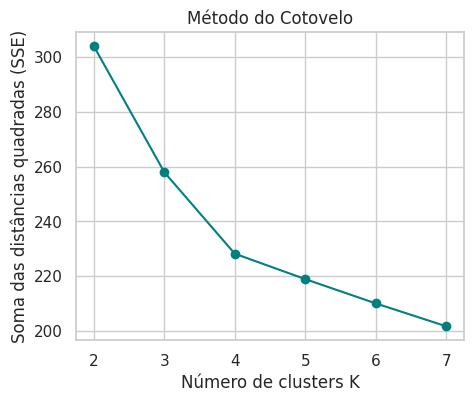

In [12]:
plt.figure(figsize=(5,4))
plt.plot(list(Ks), sse, marker='o', color='teal')
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters K")
plt.ylabel("Soma das distâncias quadradas (SSE)")
plt.xticks(Ks)
plt.show()


O cotovelo é notável em K=3: para K>3 a redução de SSE é menos acentuada. A silhueta máxima em K=2 sugere apenas 2 grupos claros, mas K=3 captura um terceiro padrão de comportamento. Para um balanço entre compactação e representatividade de perfis, adotamos K=3 clusters. Essa escolha é justificada pelo forte decréscimo de SSE até K=3 e pela interpretação qualitativa dos clusters que veremos a seguir.

# 6. Resultados do K-Means e Revisão Crítica das Hipóteses

Agora que escolhemos K=3, reexecutamos o K-Means manual para obter os clusters finais:



In [13]:
K = 3
centroids, labels = kmeans_manual(X_norm, K)
df['cluster'] = labels  # adicionar rótulo de cluster ao DataFrame
df.cluster.value_counts().sort_index()


,count
cluster,
0,335
1,343
2,322


In [14]:
cluster_summary = df.groupby('cluster')[features + ['exam_score']].mean().round(2)
cluster_summary['count'] = df.cluster.value_counts().sort_index().values
cluster_summary


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,count
cluster,,,,,,,,,
0,3.51,2.49,1.78,83.35,6.45,2.82,8.61,75.07,335
1,3.66,2.60,1.81,84.85,6.44,1.30,3.59,64.21,343
2,3.48,2.43,1.87,84.18,6.52,5.13,4.11,69.65,322
